### Dataset Generating

Inflation

In [12]:
import pandas as pd
import numpy as np

# Parameters for the synthetic dataset
start_date = '2003-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # Business days only

# Generate synthetic inflation data (starting around 2% and fluctuating)
inflation_base = 2  # Starting inflation rate at 2%
inflation = inflation_base + np.random.normal(0, 0.02, n).cumsum()  # Small daily changes

# Create a pandas DataFrame with dates, closing prices, and inflation
data = pd.DataFrame(data={'Date': date_range, 'Inflation': inflation})

# Set Date as the index
data.set_index('Date', inplace=True)

# Display the first few rows of the synthetic dataset
print(data.head())

# Save the dataset to a CSV file using forward slashes (adjust this base on you PC directory)
data.to_csv('C:/Users/Natchapol/Downloads/ftse_copy.csv')


            Inflation
Date                 
2003-01-01   1.990354
2003-01-02   2.012333
2003-01-03   2.051530
2003-01-06   2.060542
2003-01-07   2.062198


FTSE 100

In [10]:
import yfinance as yf

# Download FTSE100 historical data (replace '^FTSE' with correct FTSE index symbol)
ftse_data = yf.download('^FTSE', start='2003-01-01', end='2023-12-31')

# Reset the index to move the Date from the index to a column
ftse_data.reset_index(inplace=True)

# Save the data to a CSV file
file_path = 'ftse_data.csv'  # Update the file path if needed
ftse_data.to_csv(file_path, index=False)

print(f"FTSE 100 data saved to {file_path}")


[*********************100%***********************]  1 of 1 completed

FTSE 100 data saved to ftse_data.csv


Return

In [11]:
import numpy as np

# Calculate daily returns: Return(t) = (P(t) - P(t-1)) / P(t-1)
ftse_data['Return'] = ftse_data['Close'].pct_change()

# Or calculate log returns (Optional)
ftse_data['Log_Return'] = np.log(ftse_data['Close'] / ftse_data['Close'].shift(1))

# Drop NaN values created by the shift
ftse_data.dropna(inplace=True)

# Save the updated dataset to a new CSV
ftse_data.to_csv('ftse_data_with_returns.csv', index=False)

print("FTSE 100 data with returns saved to 'ftse_data_with_returns.csv'")


FTSE 100 data with returns saved to 'ftse_data_with_returns.csv'


Concatinating data

In [14]:
import pandas as pd

# Step 1: Load the FTSE data and inflation data
ftse_data = pd.read_csv('ftse_data_with_returns.csv')  # Assuming 'ftse_data.csv' contains FTSE data with Date
inflation_data = pd.read_csv('ftse_copy.csv')  # Assuming 'inflation_data.csv' contains Date and Inflation Rate

# Step 2: Drop the 'Date' column from the inflation data
inflation_data = inflation_data.drop(columns=['Date'])

# Step 3: Concatenate the datasets along the columns
ftse_with_inflation = pd.concat([ftse_data, inflation_data], axis=1)

# Step 4: Save the final dataset to a CSV file
ftse_with_inflation.to_csv('Complete_ftse_with_inflation.csv', index=False)

print("FTSE data with inflation concatenated and saved to 'ftse_with_inflation.csv'")


FTSE data with inflation concatenated and saved to 'ftse_with_inflation.csv'


Data Preprocessing

In [15]:
file_path = r'Complete_ftse_with_inflation.csv'

Missing values in dataset:
Open          176
High          176
Low           176
Close         176
Adj Close     176
Volume        176
Return        176
Log_Return    176
Inflation       0
dtype: int64


C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\1118085844.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\1118085844.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\1118085844.py:17: FutureWarning: A value is trying 

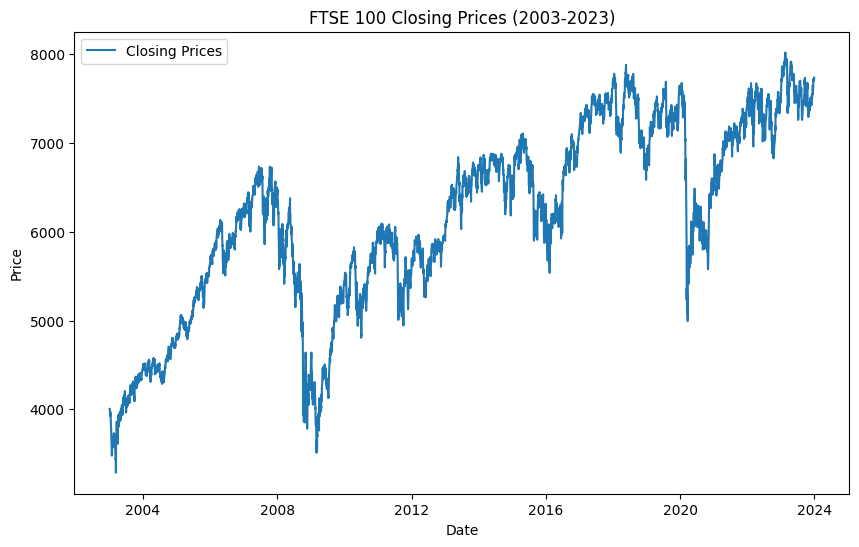

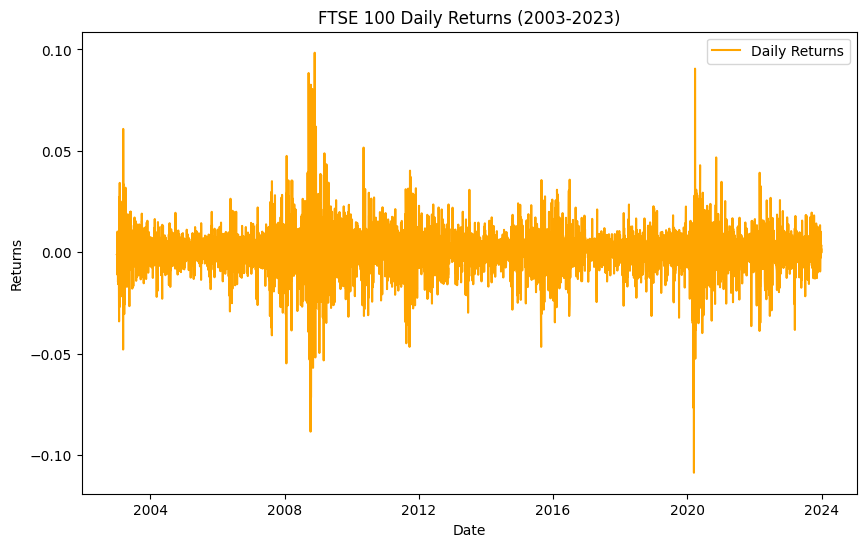

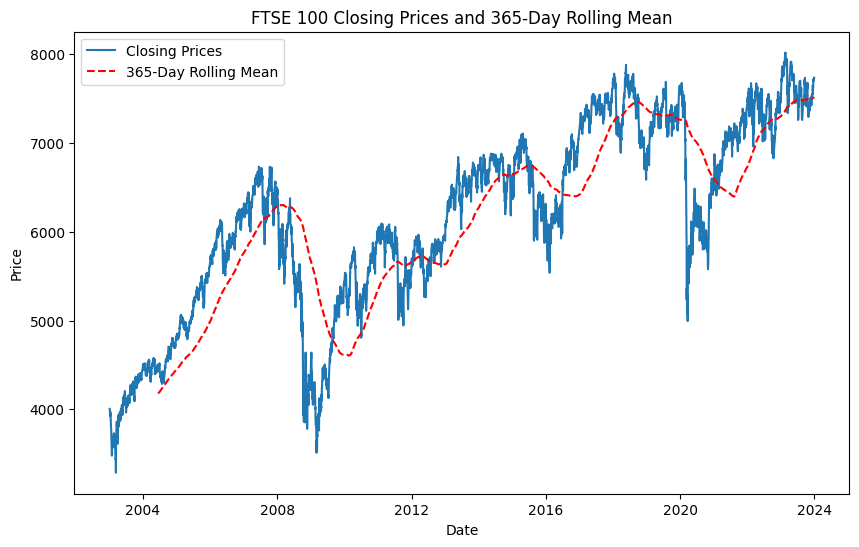

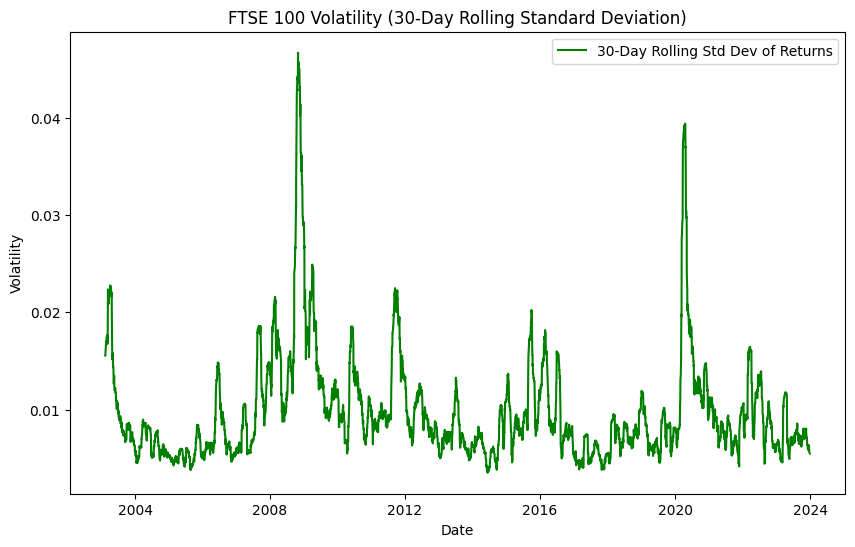

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())

# Fill missing values for 'Close' with forward fill
data['Close'].fillna(method='ffill', inplace=True)

# Fill NaN values for returns with backward fill (if any)
data['Return'].fillna(method='bfill', inplace=True)

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Prices')
plt.title('FTSE 100 Closing Prices (2003-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the returns
plt.figure(figsize=(10, 6))
plt.plot(data['Return'], label='Daily Returns', color='orange')
plt.title('FTSE 100 Daily Returns (2003-2023)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Check for seasonality in closing prices using a rolling mean
data['Rolling_Mean_365'] = data['Close'].rolling(window=365).mean()

# Plot the seasonality (365-day rolling mean)
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Prices')
plt.plot(data['Rolling_Mean_365'], label='365-Day Rolling Mean', color='red', linestyle='--')
plt.title('FTSE 100 Closing Prices and 365-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Volatility using the rolling standard deviation of returns
data['Rolling_Std_30'] = data['Return'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(data['Rolling_Std_30'], label='30-Day Rolling Std Dev of Returns', color='green')
plt.title('FTSE 100 Volatility (30-Day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


Deal with Missing Data

Missing values before filling:
Open          176
High          176
Low           176
Close         176
Adj Close     176
Volume        176
Return        176
Log_Return    176
dtype: int64

Missing values after forward and backward filling:
Series([], dtype: int64)


C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\3951271035.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill = data.fillna(method='ffill')  # Forward fill
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\3951271035.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data_ffill.fillna(method='bfill')  # Backward fill (after forward fill)


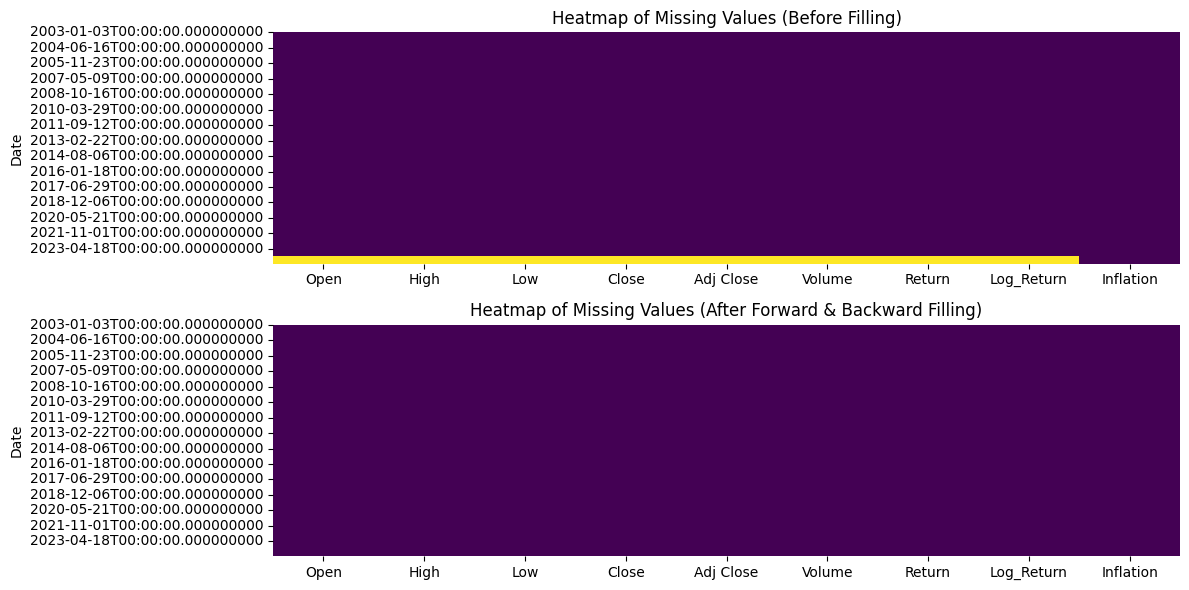


Summary statistics of the filled data:
              Open         High          Low        Close    Adj Close  \
count  5478.000000  5478.000000  5478.000000  5478.000000  5478.000000   
mean   6209.058623  6247.610623  6170.875268  6210.063369  6210.063369   
std    1077.977006  1076.024731  1080.765015  1078.233094  1078.233094   
min    3287.000000  3466.399902  3277.500000  3287.000000  3287.000000   
25%    5510.849854  5549.374878  5468.274902  5511.425049  5511.425049   
50%    6306.200195  6346.599854  6262.850098  6307.000000  6307.000000   
75%    7147.974976  7188.600098  7107.524902  7148.375000  7148.375000   
max    8014.299805  8047.100098  7995.500000  8014.299805  8014.299805   

             Volume       Return   Log_Return    Inflation  
count  5.478000e+03  5478.000000  5478.000000  5478.000000  
mean   1.023677e+09     0.000224     0.000164     1.281051  
std    4.811020e+08     0.010971     0.010988     0.352294  
min    8.378200e+06    -0.108738    -0.115117    

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the historical FTSE 100 daily closing price data (2003-2023)
data = pd.read_csv(file_path)

# Convert Date column to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values
missing_values_before = data.isnull().sum()
print("Missing values before filling:")
print(missing_values_before[missing_values_before > 0])

# Forward fill and backward fill missing values
data_ffill = data.fillna(method='ffill')  # Forward fill
data_filled = data_ffill.fillna(method='bfill')  # Backward fill (after forward fill)

# Check for missing values after filling
missing_values_after = data_filled.isnull().sum()
print("\nMissing values after forward and backward filling:")
print(missing_values_after[missing_values_after > 0])

# Plot the heatmap of missing values before and after filling
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Before Filling)')

plt.subplot(2, 1, 2)
sns.heatmap(data_filled.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (After Forward & Backward Filling)')

plt.tight_layout()
plt.show()

# Display summary statistics of the filled data
print("\nSummary statistics of the filled data:")
print(data_filled.describe())


Naive Forecasting Models (Benchmarks)
1.  Naive Forecasting

Missing values in dataset:
Open          176
High          176
Low           176
Close         176
Adj Close     176
Volume        176
Return        176
Log_Return    176
Inflation       0
dtype: int64


C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\2940925754.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\2940925754.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\2940925754.py:18: FutureWarning: A value is trying 

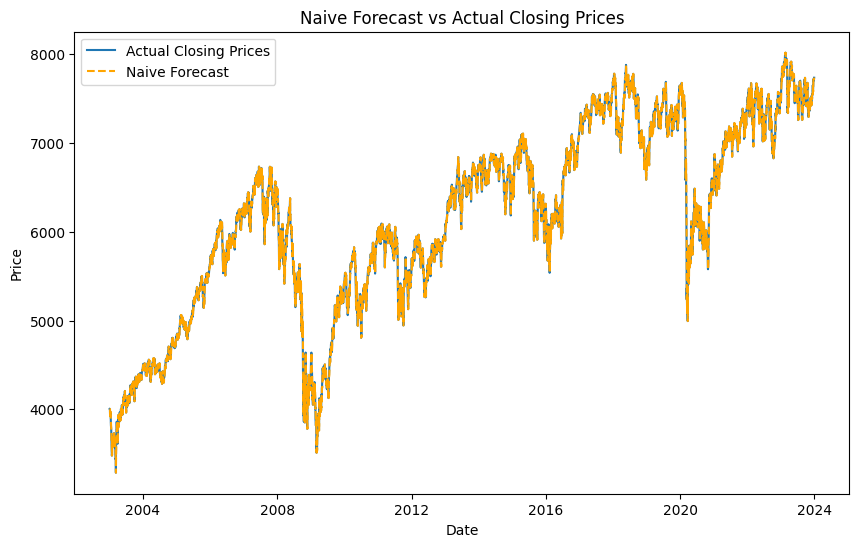

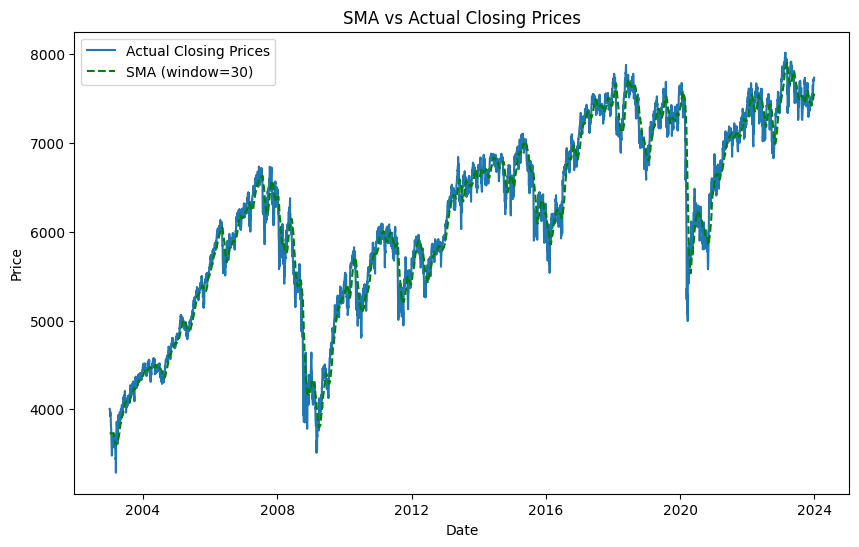

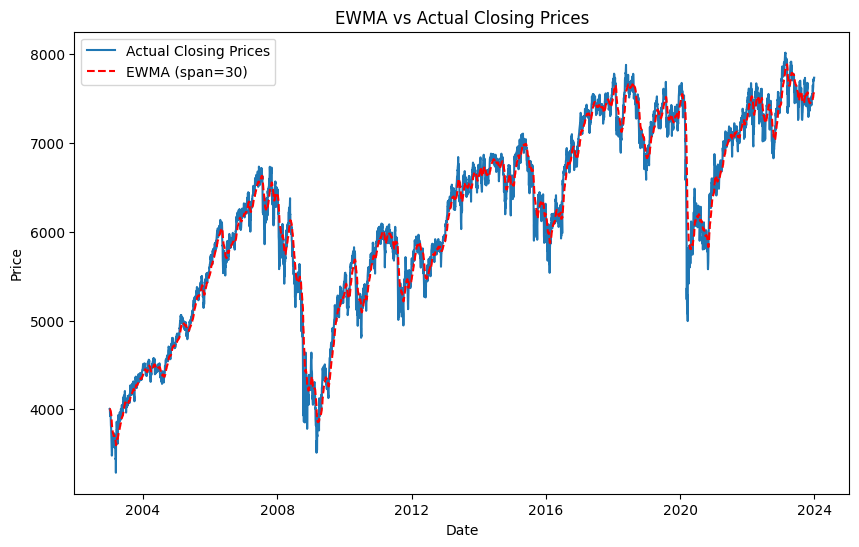

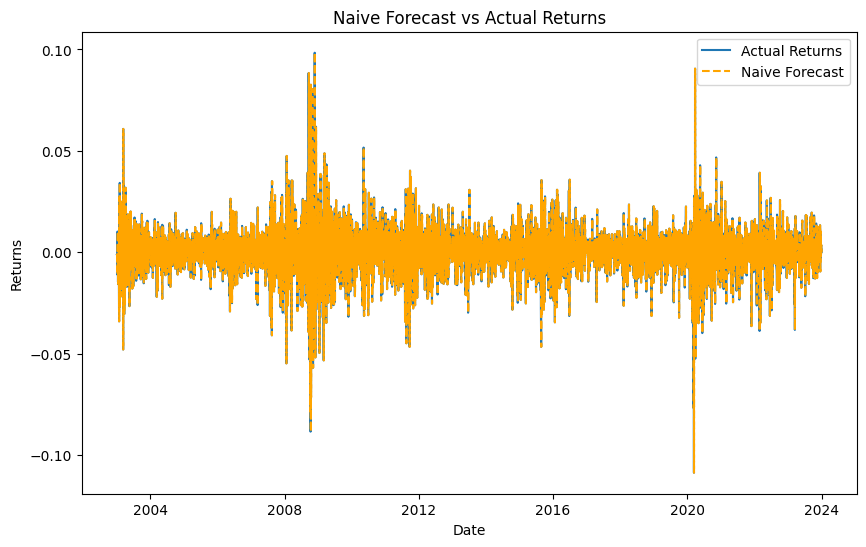

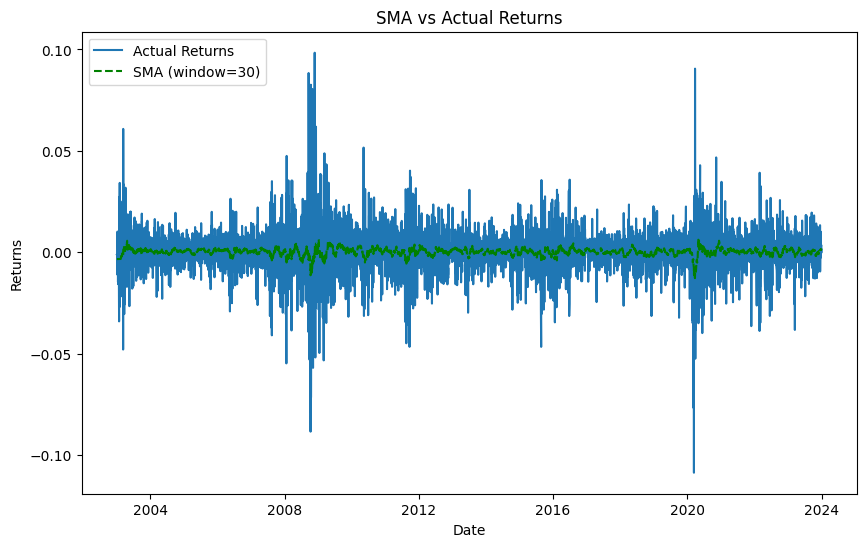

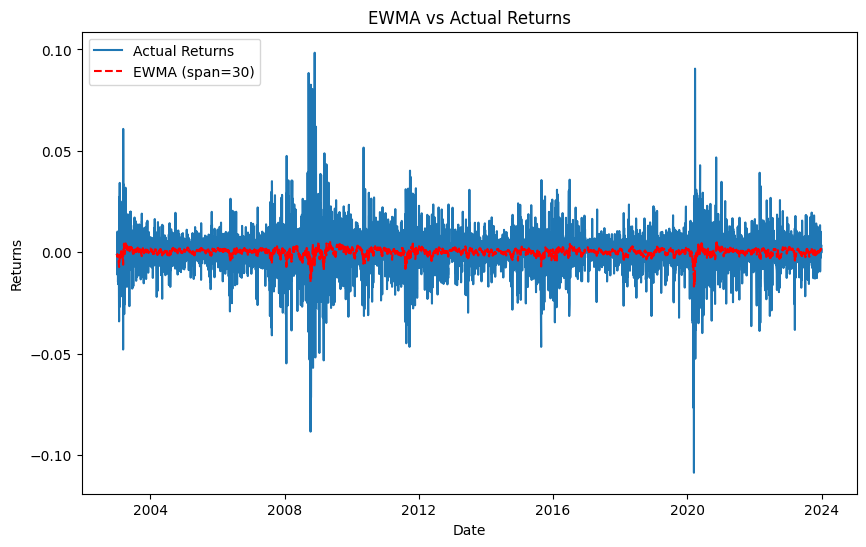

Naive Forecast - RMSE (Close): 62.3464, MAE (Close): 43.1052
Naive Forecast - RMSE (Return): 0.0161, MAE (Return): 0.0110
SMA (window=30) - RMSE (Close): 173.7174, MAE (Close): 124.0508
SMA (window=30) - RMSE (Return): 0.0110, MAE (Return): 0.0075
EWMA (span=30) - RMSE (Close): 146.7876, MAE (Close): 104.7748
EWMA (span=30) - RMSE (Return): 0.0107, MAE (Return): 0.0072


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())

# Fill missing values for 'Close' with forward fill
data['Close'].fillna(method='ffill', inplace=True)

# Fill NaN values for returns with backward fill (if any)
data['Return'].fillna(method='bfill', inplace=True)

# Naive Forecast, Simple Moving Average (SMA), and EWMA

# 2.1 Naive Forecast
data['Naive_Forecast_Close'] = data['Close'].shift(1)
data['Naive_Forecast_Return'] = data['Return'].shift(1)

# 2.2 Simple Moving Average (SMA)
window_size = 30  # Adjust window size as needed
data['SMA_Close'] = data['Close'].rolling(window=window_size).mean()
data['SMA_Return'] = data['Return'].rolling(window=window_size).mean()

# 2.3 Exponentially Weighted Moving Average (EWMA)
span = 30  # Span controls the decay rate, adjust as needed
data['EWMA_Close'] = data['Close'].ewm(span=span, adjust=False).mean()
data['EWMA_Return'] = data['Return'].ewm(span=span, adjust=False).mean()

# Fill NaN values using forward fill and then backward fill for safety
data['Naive_Forecast_Close'].fillna(method='ffill', inplace=True)
data['Naive_Forecast_Close'].fillna(method='bfill', inplace=True)

data['SMA_Close'].fillna(method='ffill', inplace=True)
data['SMA_Close'].fillna(method='bfill', inplace=True)

data['EWMA_Close'].fillna(method='ffill', inplace=True)
data['EWMA_Close'].fillna(method='bfill', inplace=True)

data['Naive_Forecast_Return'].fillna(method='ffill', inplace=True)
data['Naive_Forecast_Return'].fillna(method='bfill', inplace=True)

data['SMA_Return'].fillna(method='ffill', inplace=True)
data['SMA_Return'].fillna(method='bfill', inplace=True)

data['EWMA_Return'].fillna(method='ffill', inplace=True)
data['EWMA_Return'].fillna(method='bfill', inplace=True)

# Plotting Naive Forecast for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual Closing Prices')
plt.plot(data['Naive_Forecast_Close'], label='Naive Forecast', linestyle='--', color='orange')
plt.title('Naive Forecast vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting SMA for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual Closing Prices')
plt.plot(data['SMA_Close'], label=f'SMA (window={window_size})', linestyle='--', color='green')
plt.title('SMA vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting EWMA for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual Closing Prices')
plt.plot(data['EWMA_Close'], label=f'EWMA (span={span})', linestyle='--', color='red')
plt.title('EWMA vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Naive Forecast for Returns
plt.figure(figsize=(10, 6))
plt.plot(data['Return'], label='Actual Returns')
plt.plot(data['Naive_Forecast_Return'], label='Naive Forecast', linestyle='--', color='orange')
plt.title('Naive Forecast vs Actual Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plotting SMA for Returns
plt.figure(figsize=(10, 6))
plt.plot(data['Return'], label='Actual Returns')
plt.plot(data['SMA_Return'], label=f'SMA (window={window_size})', linestyle='--', color='green')
plt.title('SMA vs Actual Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plotting EWMA for Returns
plt.figure(figsize=(10, 6))
plt.plot(data['Return'], label='Actual Returns')
plt.plot(data['EWMA_Return'], label=f'EWMA (span={span})', linestyle='--', color='red')
plt.title('EWMA vs Actual Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Evaluation Metrics (RMSE and MAE) for Naive, SMA, and EWMA

# Ensure NaN values are dropped from both the actual and forecasted closing prices and returns
aligned_close_naive = pd.concat([data['Close'], data['Naive_Forecast_Close']], axis=1).dropna()
aligned_return_naive = pd.concat([data['Return'], data['Naive_Forecast_Return']], axis=1).dropna()

# Naive Forecast Evaluation
rmse_naive_close = np.sqrt(mean_squared_error(aligned_close_naive['Close'], aligned_close_naive['Naive_Forecast_Close']))
mae_naive_close = mean_absolute_error(aligned_close_naive['Close'], aligned_close_naive['Naive_Forecast_Close'])
print(f'Naive Forecast - RMSE (Close): {rmse_naive_close:.4f}, MAE (Close): {mae_naive_close:.4f}')

rmse_naive_return = np.sqrt(mean_squared_error(aligned_return_naive['Return'], aligned_return_naive['Naive_Forecast_Return']))
mae_naive_return = mean_absolute_error(aligned_return_naive['Return'], aligned_return_naive['Naive_Forecast_Return'])
print(f'Naive Forecast - RMSE (Return): {rmse_naive_return:.4f}, MAE (Return): {mae_naive_return:.4f}')

# SMA Evaluation
aligned_close_sma = pd.concat([data['Close'], data['SMA_Close']], axis=1).dropna()
aligned_return_sma = pd.concat([data['Return'], data['SMA_Return']], axis=1).dropna()

rmse_sma_close = np.sqrt(mean_squared_error(aligned_close_sma['Close'], aligned_close_sma['SMA_Close']))
mae_sma_close = mean_absolute_error(aligned_close_sma['Close'], aligned_close_sma['SMA_Close'])
print(f'SMA (window={window_size}) - RMSE (Close): {rmse_sma_close:.4f}, MAE (Close): {mae_sma_close:.4f}')

rmse_sma_return = np.sqrt(mean_squared_error(aligned_return_sma['Return'], aligned_return_sma['SMA_Return']))
mae_sma_return = mean_absolute_error(aligned_return_sma['Return'], aligned_return_sma['SMA_Return'])
print(f'SMA (window={window_size}) - RMSE (Return): {rmse_sma_return:.4f}, MAE (Return): {mae_sma_return:.4f}')

# EWMA Evaluation
aligned_close_ewma = pd.concat([data['Close'], data['EWMA_Close']], axis=1).dropna()
aligned_return_ewma = pd.concat([data['Return'], data['EWMA_Return']], axis=1).dropna()

rmse_ewma_close = np.sqrt(mean_squared_error(aligned_close_ewma['Close'], aligned_close_ewma['EWMA_Close']))
mae_ewma_close = mean_absolute_error(aligned_close_ewma['Close'], aligned_close_ewma['EWMA_Close'])
print(f'EWMA (span={span}) - RMSE (Close): {rmse_ewma_close:.4f}, MAE (Close): {mae_ewma_close:.4f}')

rmse_ewma_return = np.sqrt(mean_squared_error(aligned_return_ewma['Return'], aligned_return_ewma['EWMA_Return']))
mae_ewma_return = mean_absolute_error(aligned_return_ewma['Return'], aligned_return_ewma['EWMA_Return'])
print(f'EWMA (span={span}) - RMSE (Return): {rmse_ewma_return:.4f}, MAE (Return): {mae_ewma_return:.4f}')


Holt-Winters Model

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

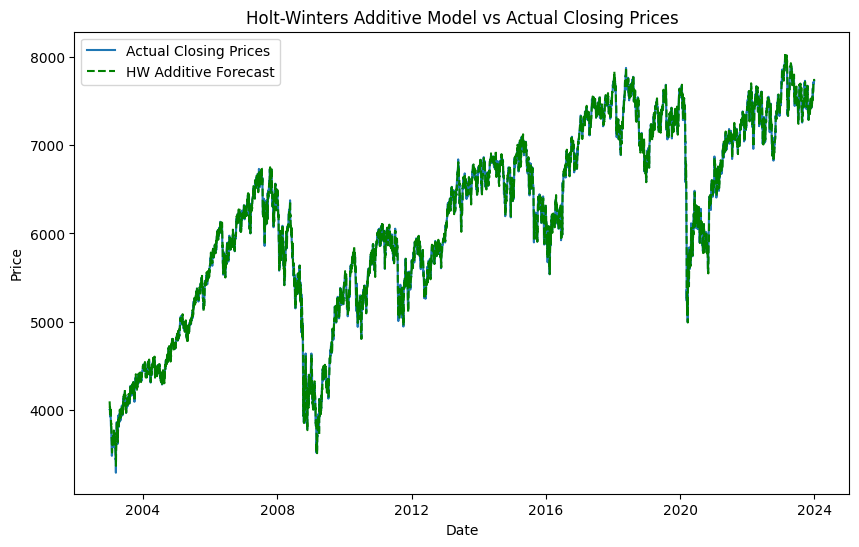

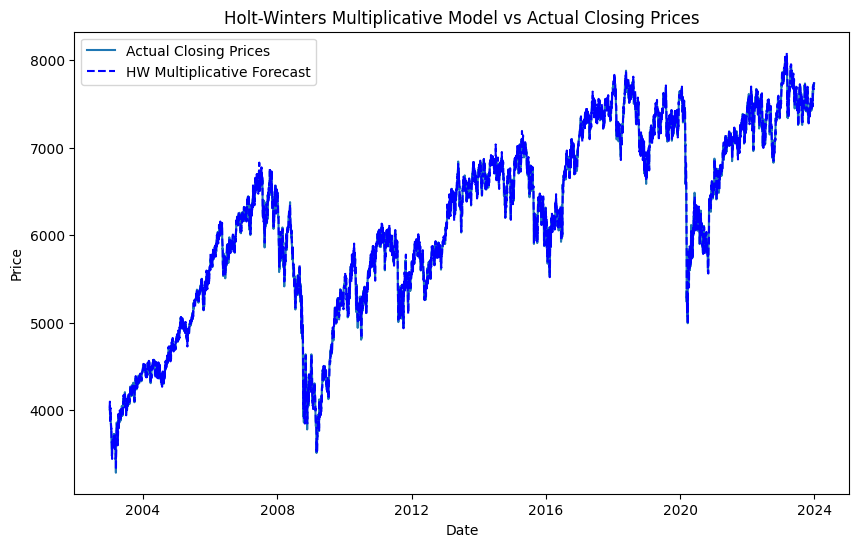

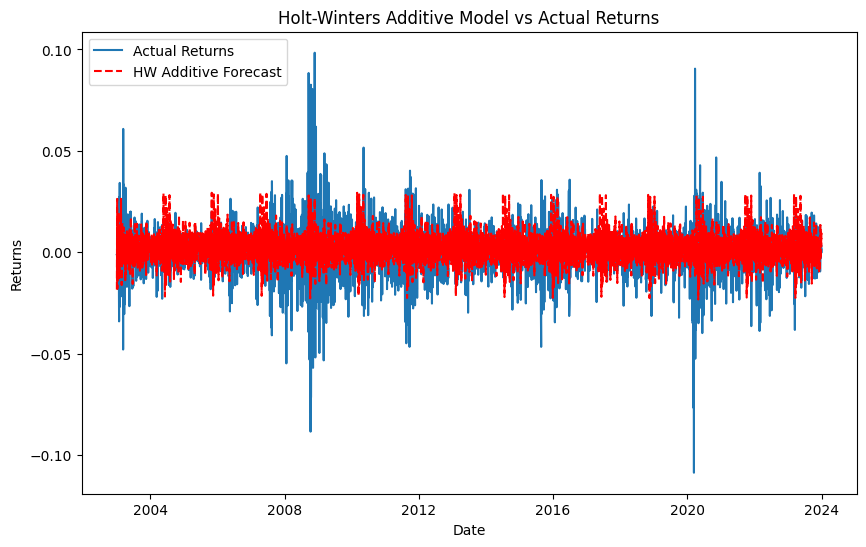

Holt-Winters Additive Model - RMSE (Close): 63.3003, MAE (Close): 45.1320
Holt-Winters Additive Model - RMSE (Return): 0.0121, MAE (Return): 0.0088
Holt-Winters Multiplicative Model - RMSE (Close): 67.2616, MAE (Close): 49.0018


In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Additive Model for Closing Prices
hw_additive_close = ExponentialSmoothing(data['Close'], seasonal='add', trend='add', seasonal_periods=365).fit()
data['HW_Additive_Forecast_Close'] = hw_additive_close.fittedvalues

# Holt-Winters Additive Model for Returns
hw_additive_return = ExponentialSmoothing(data['Return'], seasonal='add', trend='add', seasonal_periods=365).fit()
data['HW_Additive_Forecast_Return'] = hw_additive_return.fittedvalues

# Holt-Winters Multiplicative Model for Closing Prices
hw_multiplicative_close = ExponentialSmoothing(data['Close'], seasonal='mul', trend='add', seasonal_periods=365).fit()
data['HW_Multiplicative_Forecast_Close'] = hw_multiplicative_close.fittedvalues

# Plot Holt-Winters Additive Forecast for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual Closing Prices')
plt.plot(data['HW_Additive_Forecast_Close'], label='HW Additive Forecast', linestyle='--', color='green')
plt.title('Holt-Winters Additive Model vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Holt-Winters Multiplicative Forecast for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual Closing Prices')
plt.plot(data['HW_Multiplicative_Forecast_Close'], label='HW Multiplicative Forecast', linestyle='--', color='blue')
plt.title('Holt-Winters Multiplicative Model vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Holt-Winters Additive Forecast for Returns
plt.figure(figsize=(10, 6))
plt.plot(data['Return'], label='Actual Returns')
plt.plot(data['HW_Additive_Forecast_Return'], label='HW Additive Forecast', linestyle='--', color='red')
plt.title('Holt-Winters Additive Model vs Actual Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Evaluation Metrics for Holt-Winters Models

# Additive Model Evaluation
rmse_hw_additive_close = np.sqrt(mean_squared_error(data['Close'], data['HW_Additive_Forecast_Close']))
mae_hw_additive_close = mean_absolute_error(data['Close'], data['HW_Additive_Forecast_Close'])
print(f'Holt-Winters Additive Model - RMSE (Close): {rmse_hw_additive_close:.4f}, MAE (Close): {mae_hw_additive_close:.4f}')

# Align the data for the Additive model
aligned_hw_additive_return = data['HW_Additive_Forecast_Return'].loc[data['Return'].dropna().index]
aligned_return_additive = data['Return'].dropna()

# Now calculate RMSE and MAE using aligned series for Additive Model
rmse_hw_additive_return = np.sqrt(mean_squared_error(aligned_return_additive, aligned_hw_additive_return))
mae_hw_additive_return = mean_absolute_error(aligned_return_additive, aligned_hw_additive_return)
print(f'Holt-Winters Additive Model - RMSE (Return): {rmse_hw_additive_return:.4f}, MAE (Return): {mae_hw_additive_return:.4f}')

# Multiplicative Model Evaluation
rmse_hw_multiplicative_close = np.sqrt(mean_squared_error(data['Close'], data['HW_Multiplicative_Forecast_Close']))
mae_hw_multiplicative_close = mean_absolute_error(data['Close'], data['HW_Multiplicative_Forecast_Close'])
print(f'Holt-Winters Multiplicative Model - RMSE (Close): {rmse_hw_multiplicative_close:.4f}, MAE (Close): {mae_hw_multiplicative_close:.4f}')



 4. ARIMA Model

Closing Prices - ADF Statistic: -2.2889182430920676
Closing Prices - p-value: 0.1755669717843117
Closing Prices is not stationary (Differencing needed)
Returns - ADF Statistic: -15.268330767167091
Returns - p-value: 4.755131003547209e-28
Returns is stationary (No differencing needed)
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=59030.732, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59034.639, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=59031.702, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=59031.525, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=59027.414, Time=0.98 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=59031.919, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=59029.583, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=59031.996, Time=0.49 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=59030.831, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=59027.449, Time=0.63 sec
 A

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Closing Prices ARIMA model summary:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5302
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -29510.594
Date:                Fri, 18 Oct 2024   AIC                          59033.189
Time:                        22:06:08   BIC                          59072.643
Sample:                             0   HQIC                         59046.976
                               - 5302                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0309      0.009     -3.449      0.001      -0.049      -0.013
ar.L2         -0.0180      0.009     -2.024      0.043      -0.035      -0.001
ar.L3         -

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

Returns ARIMA model summary:
                                SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 5302
Model:                 ARIMA(5, 1, 0)   Log Likelihood               15859.306
Date:                Fri, 18 Oct 2024   AIC                         -31706.612
Time:                        22:06:10   BIC                         -31667.158
Sample:                             0   HQIC                        -31692.825
                               - 5302                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8542      0.007   -114.305      0.000      -0.869      -0.840
ar.L2         -0.6918      0.010    -67.469      0.000      -0.712      -0.672
ar.L3         -0.5343 

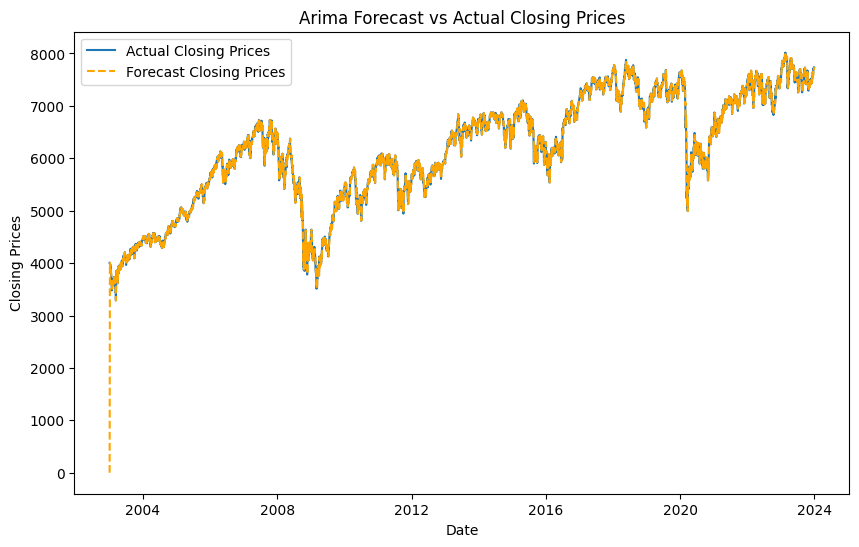

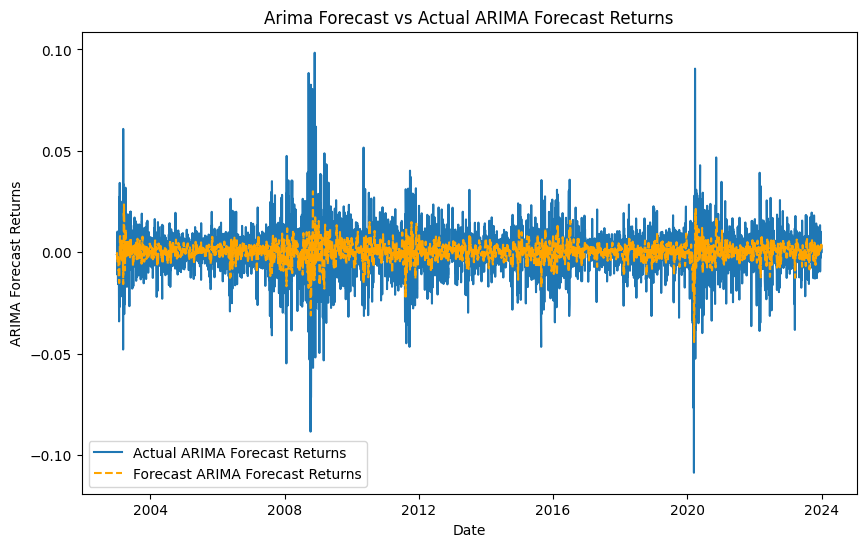

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima  # For Auto-ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller  # For ADF test

# Load your dataset (replace with your dataset path)
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Step 1: Stationarity Check and Differencing
def check_stationarity(series, series_name):
    adf_test = adfuller(series.dropna())  # Added adfuller import
    print(f"{series_name} - ADF Statistic: {adf_test[0]}")
    print(f"{series_name} - p-value: {adf_test[1]}")
    if adf_test[1] < 0.05:
        print(f"{series_name} is stationary (No differencing needed)")
        return 0  # No differencing needed
    else:
        print(f"{series_name} is not stationary (Differencing needed)")
        return 1  # Differencing needed

# Check for Closing Prices
d_price = check_stationarity(data['Close'], "Closing Prices")

# Check for Returns (Usually, returns are stationary)
if 'Return' in data.columns:
    d_return = check_stationarity(data['Return'], "Returns")
else:
    data['Return'] = data['Close'].pct_change().dropna()
    d_return = check_stationarity(data['Return'], "Returns")

# Step 2: Use Auto-ARIMA for better parameter selection
# Auto-ARIMA for Closing Prices
auto_arima_price = auto_arima(data['Close'].diff().dropna() if d_price == 1 else data['Close'], seasonal=False, trace=True)
p_price, d_price, q_price = auto_arima_price.order
print(f"Optimal ARIMA order for Closing Prices: {auto_arima_price.order}")

# Auto-ARIMA for Returns
auto_arima_return = auto_arima(data['Return'].dropna(), seasonal=False, trace=True)
p_return, d_return, q_return = auto_arima_return.order
print(f"Optimal ARIMA order for Returns: {auto_arima_return.order}")

# Step 3: Fit ARIMA models for both series using the best parameters found
def fit_arima(series, p, d, q, series_name):
    model_fitted = ARIMA(series.dropna(), order=(5,1,0)).fit()
    print(f"{series_name} ARIMA model summary:\n", model_fitted.summary())
    return model_fitted

# Fit ARIMA for Closing Prices
arima_price_fitted = fit_arima(data['Close'].diff().dropna() if d_price == 1 else data['Close'], p_price, d_price, q_price, "Closing Prices")

# Fit ARIMA for Returns
arima_return_fitted = fit_arima(data['Return'].dropna(), p_return, d_return, q_return, "Returns")

# Step 4: Add ARIMA forecast to the dataset
data['ARIMA_Forecast_Close'] = arima_price_fitted.fittedvalues

# If differencing was applied, align the forecast by shifting it
if d_price == 1:
    data['ARIMA_Forecast_Close'] = data['ARIMA_Forecast_Close'].shift(1)

data['ARIMA_Forecast_Return'] = arima_return_fitted.fittedvalues

# Step 5: Evaluate model performance
def evaluate_model(actual, forecast, series_name):
    # Align the series to make sure they have the same length
    actual, forecast = actual.align(forecast, join='inner')
    
    # Drop any remaining NaN values after alignment
    actual = actual.dropna()
    forecast = forecast.dropna()
    
    # Check if the lengths are now equal
    if len(actual) != len(forecast):
        print(f"Error: {series_name} actual and forecast series are not of the same length.")
        print(f"Actual length: {len(actual)}, Forecast length: {len(forecast)}")
        return None
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    print(f"{series_name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return rmse, mae

# Evaluate ARIMA for Closing Prices
close_actual, close_forecast = data['Close'].align(data['ARIMA_Forecast_Close'], join='inner')
evaluate_model(close_actual, close_forecast, "Closing Prices")

# Evaluate ARIMA for Returns
return_actual, return_forecast = data['Return'].align(data['ARIMA_Forecast_Return'], join='inner')
evaluate_model(return_actual, return_forecast, "Returns")

# Step 6: Plot ARIMA forecasts
def plot_forecast(actual, forecast, series_name):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label=f'Actual {series_name}')
    plt.plot(forecast, label=f'Forecast {series_name}', linestyle='--', color='orange')
    plt.title(f'Arima Forecast vs Actual {series_name}')
    plt.xlabel('Date')
    plt.ylabel(series_name)
    plt.legend()
    plt.show()

# Plot ARIMA Forecast for Closing Prices
plot_forecast(close_actual, close_forecast, "Closing Prices")

# Plot ARIMA for Returns
plot_forecast(return_actual, return_forecast, "ARIMA Forecast Returns")


ARIMAX Model with Exogenous Variables

Missing values in the dataset:
Open                         176
High                         176
Low                          176
Close                          0
Adj Close                    176
Volume                       176
Return                       176
Log_Return                   176
Inflation                      0
SARIMA_Close_Forecast_s4       0
SARIMA_Return_Forecast_s4      0
Inflation_scaled               0
Close_scaled                 176
ARIMAX_Forecast_scaled         0
ARIMAX_Forecast_Close          0
dtype: int64


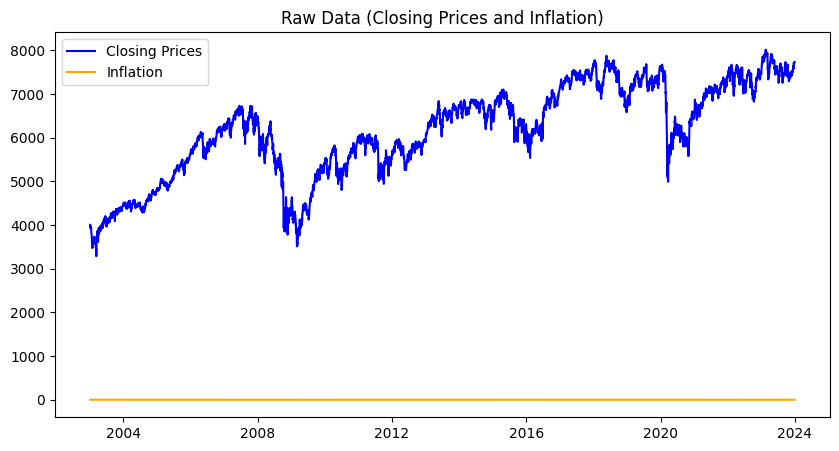

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

ARIMAX Forecast Closing Prices - RMSE: 63.1921, MAE: 43.2825


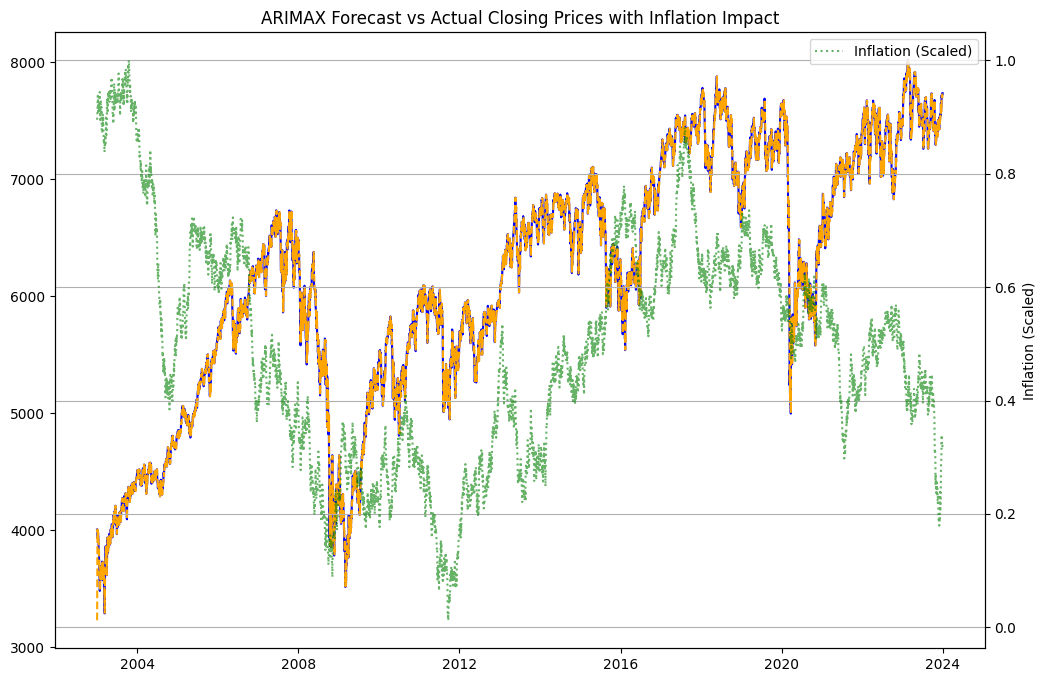

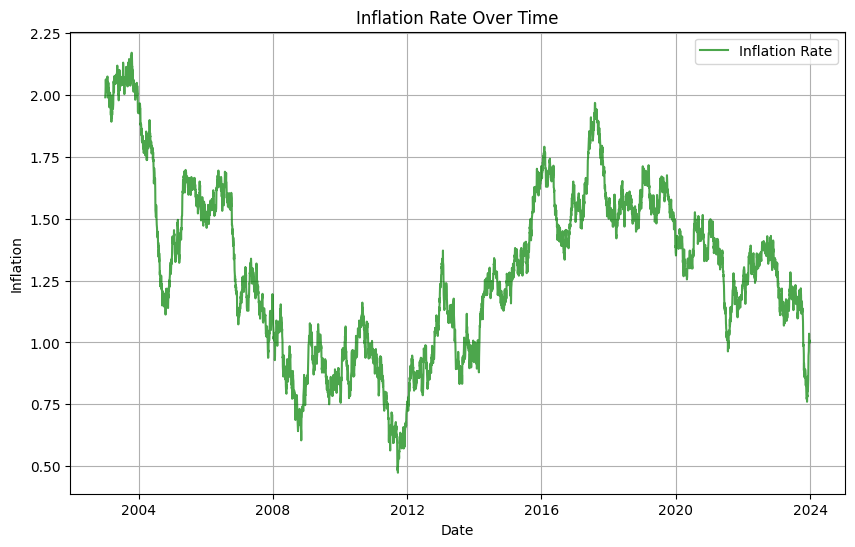

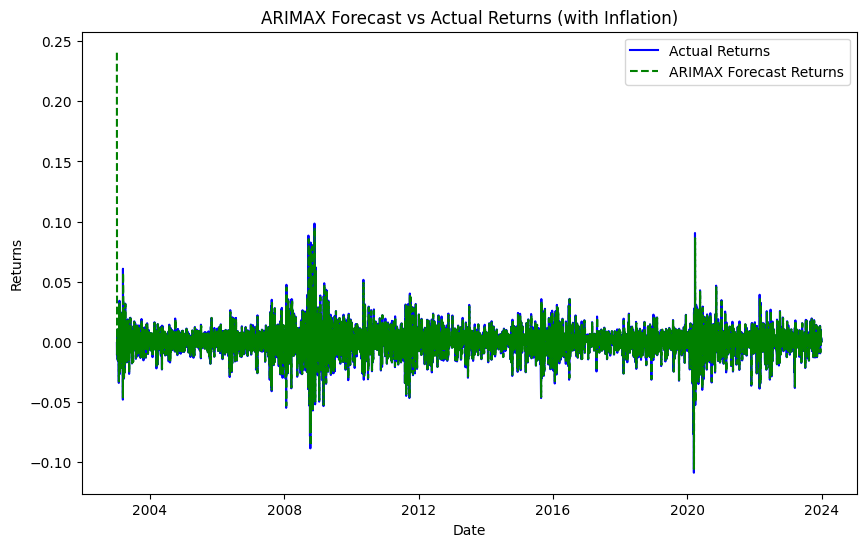

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 0: Check for missing data and visualize the raw data
print("Missing values in the dataset:")
print(data.isnull().sum())

# Plot the raw data to check for anomalies
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Closing Prices', color='blue')
plt.plot(data['Inflation'], label='Inflation', color='orange')
plt.legend()
plt.title('Raw Data (Closing Prices and Inflation)')
plt.show()
# Step 1: Normalize the Inflation data using MinMaxScaler
scaler_inflation = MinMaxScaler(feature_range=(0, 1))
data['Inflation_scaled'] = scaler_inflation.fit_transform(data['Inflation'].values.reshape(-1, 1))

# Step 2: Scale the Closing Prices using MinMaxScaler
scaler_close = MinMaxScaler(feature_range=(0, 1))
data['Close_scaled'] = scaler_close.fit_transform(data['Close'].values.reshape(-1, 1))

# Step 3: Manually define ARIMAX parameters
p = 2  # Autoregressive order
d = 0  # Differencing order
q = 2  # Moving average order

# Fit ARIMAX model on scaled data
arimax_model_scaled = SARIMAX(data['Close_scaled'], order=(p, d, q), exog=data[['Inflation_scaled']])
arimax_fitted_scaled = arimax_model_scaled.fit(disp=False)

# Step 4: Inverse Transform Forecast Back to Original Scale
data['ARIMAX_Forecast_scaled'] = arimax_fitted_scaled.fittedvalues
# Inverse scale the forecast back to the original scale of closing prices
data['ARIMAX_Forecast_Close'] = scaler_close.inverse_transform(data['ARIMAX_Forecast_scaled'].values.reshape(-1, 1))

# Step 5: Evaluate Model
def evaluate_model(actual, forecast, series_name):
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    print(f"{series_name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return rmse, mae

# Align actual and forecasted closing prices for evaluation
close_actual, close_forecast = data['Close'].align(data['ARIMAX_Forecast_Close'], join='inner')

# Evaluate ARIMAX model performance for Closing Prices
evaluate_model(close_actual, close_forecast, "ARIMAX Forecast Closing Prices")

# Step 6: Plot ARIMAX Forecast vs Actual with Inflation Impact
plt.figure(figsize=(12, 8))

# Plot actual closing prices
plt.plot(data.index, close_actual, label='Actual Closing Prices', color='blue')

# Plot ARIMAX forecasted closing prices
plt.plot(data.index, close_forecast, label='ARIMAX Forecast Closing Prices', linestyle='--', color='orange')

# Plot the exogenous variable (inflation) on a secondary y-axis to show its trend
plt.twinx()
plt.plot(data.index, data['Inflation_scaled'], label='Inflation (Scaled)', color='green', linestyle=':', alpha=0.6)

# Customize the plot
plt.title('ARIMAX Forecast vs Actual Closing Prices with Inflation Impact')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend(loc='upper left')
plt.grid(True)

# Secondary y-axis for inflation
plt.ylabel('Inflation (Scaled)')
plt.legend(loc='upper right')
plt.show()

# Additionally, plot the inflation separately to provide better context
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Inflation'], label='Inflation Rate', color='green', linestyle='-', alpha=0.7)
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.show()

# If you want to forecast returns, you'll need to calculate returns first.
# This assumes you have a 'Returns' column. If you need to compute it:
data['Returns'] = data['Close'].pct_change()

# Plot ARIMAX Forecast for Returns (if needed)
return_actual, return_forecast = data['Returns'].align(data['ARIMAX_Forecast_Close'].pct_change(), join='inner')

plt.figure(figsize=(10, 6))
plt.plot(return_actual, label='Actual Returns', color='blue')
plt.plot(return_forecast, label='ARIMAX Forecast Returns', linestyle='--', color='green')
plt.title('ARIMAX Forecast vs Actual Returns (with Inflation)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


SARIMA Model
    1.Plot ACF and PACF Graphs

Found 175 duplicate dates. Removing duplicates.


C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\334273129.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Return'] = data['Close'].pct_change()


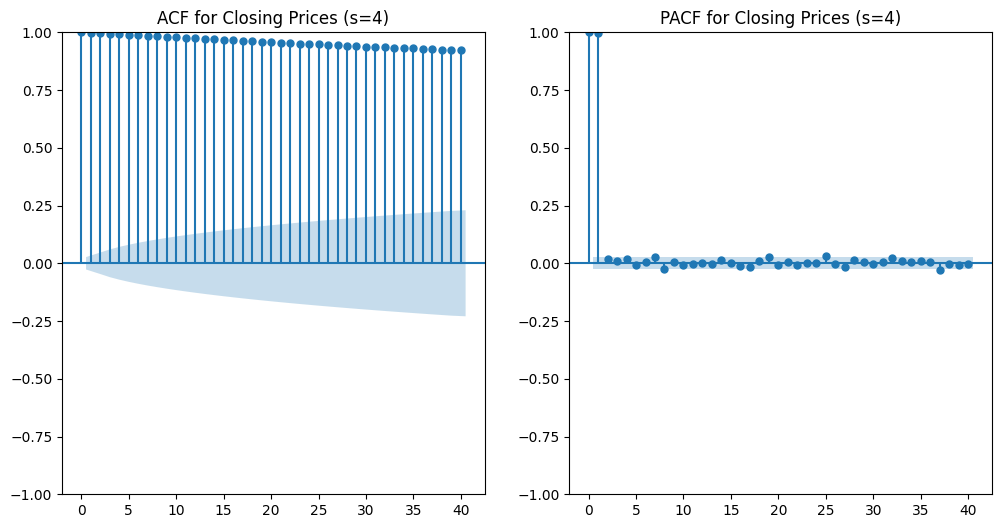

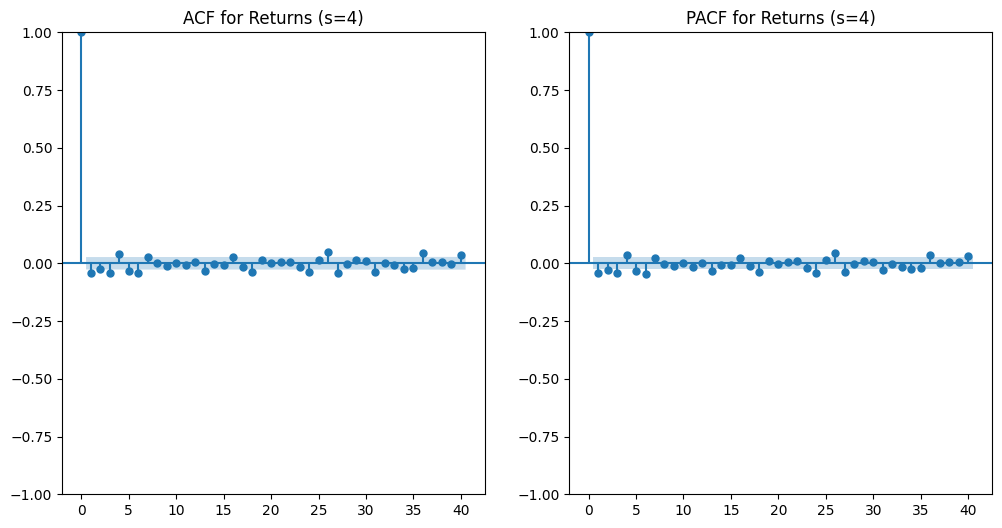

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the FTSE 100 data
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# **Check for duplicate dates and remove them**:
if data.index.duplicated().any():
    print(f"Found {data.index.duplicated().sum()} duplicate dates. Removing duplicates.")
    data = data[~data.index.duplicated(keep='first')]  # Keep the first occurrence of each duplicate

# Set frequency to business days
data = data.asfreq('B')

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Drop NaN values after calculating returns
data.dropna(inplace=True)

# Plot ACF and PACF for Closing Prices with s=4
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Close'], lags=40, ax=plt.gca())
plt.title('ACF for Closing Prices (s=4)')

plt.subplot(122)
plot_pacf(data['Close'], lags=40, ax=plt.gca())
plt.title('PACF for Closing Prices (s=4)')
plt.show()

# Plot ACF and PACF for Returns
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Return'], lags=40, ax=plt.gca())
plt.title('ACF for Returns (s=4)')

plt.subplot(122)
plot_pacf(data['Return'], lags=40, ax=plt.gca())
plt.title('PACF for Returns (s=4)')
plt.show()


    2.Fit SARIMA Model for Closing Prices

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

Missing values in 'Close': 176
Missing values in 'SARIMA_Close_Forecast_s4': 0
SARIMA Model (s=4) for Closing Prices - RMSE: 88.27029297275733, MAE: 45.6511925423739


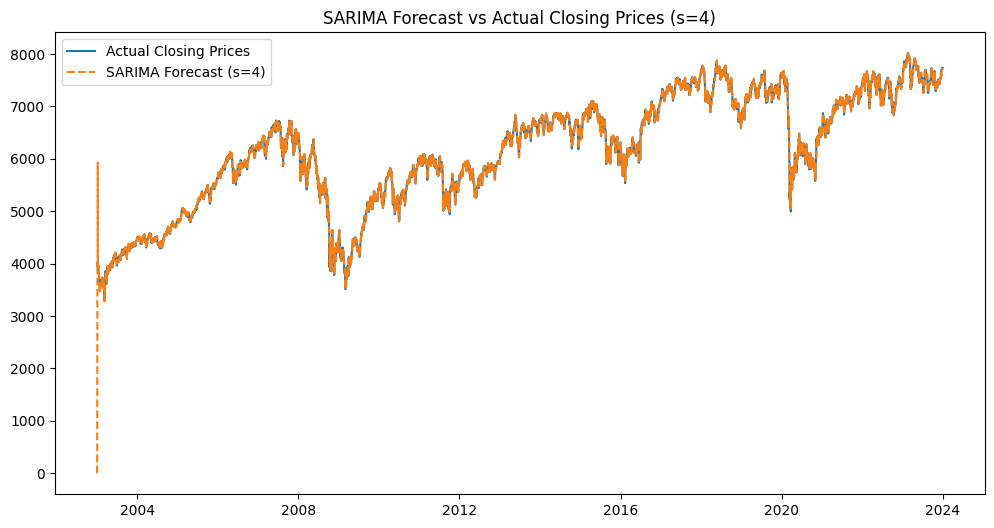

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Set seasonal period to s=4
P, D, Q, s = 1, 1, 1, 4

# Fit SARIMA model for closing prices
sarima_close_s4 = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(P, D, Q, s))
sarima_close_s4_fitted = sarima_close_s4.fit(disp=False)

# Forecast fitted values for closing prices with s=4
data['SARIMA_Close_Forecast_s4'] = sarima_close_s4_fitted.fittedvalues

# Check for missing values
print("Missing values in 'Close':", data['Close'].isna().sum())
print("Missing values in 'SARIMA_Close_Forecast_s4':", data['SARIMA_Close_Forecast_s4'].isna().sum())

# Drop NaN values for evaluation
eval_data = data[['Close', 'SARIMA_Close_Forecast_s4']].dropna()

# Evaluate model performance for Closing Prices with s=4
rmse_close_s4 = np.sqrt(mean_squared_error(eval_data['Close'], eval_data['SARIMA_Close_Forecast_s4']))
mae_close_s4 = mean_absolute_error(eval_data['Close'], eval_data['SARIMA_Close_Forecast_s4'])
print(f'SARIMA Model (s=4) for Closing Prices - RMSE: {rmse_close_s4}, MAE: {mae_close_s4}')

# Plot the forecast vs actual for Closing Prices with s=4
plt.figure(figsize=(12, 6))
plt.plot(eval_data['Close'], label='Actual Closing Prices')
plt.plot(eval_data['SARIMA_Close_Forecast_s4'], label='SARIMA Forecast (s=4)', linestyle='--')
plt.title('SARIMA Forecast vs Actual Closing Prices (s=4)')
plt.legend()
plt.show()


    3.Fit SARIMA Model for Stock Returns

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

Missing values in 'Return': 176
Missing values in 'SARIMA_Return_Forecast_s4': 0
SARIMA Model (s=4) for Returns - RMSE: 0.013865799847073118, MAE: 0.0095598904724916


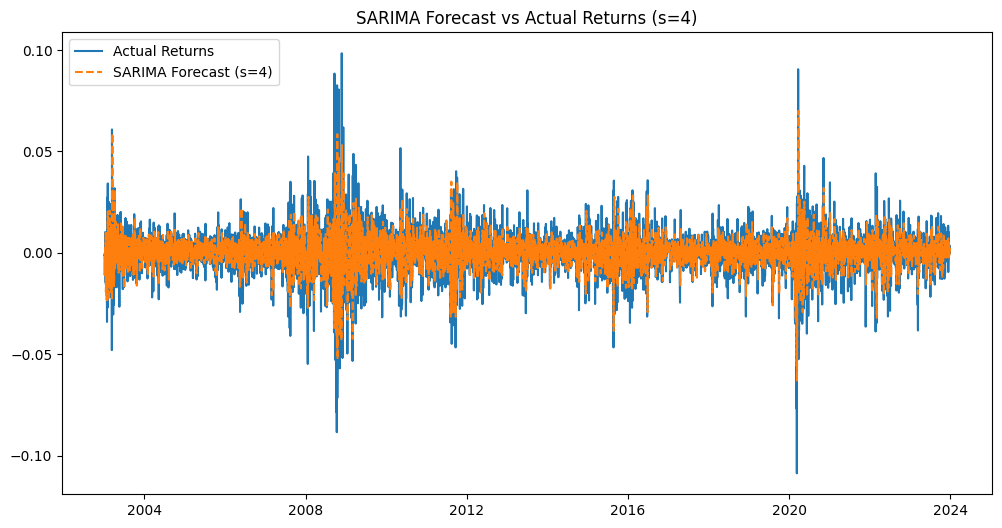

In [48]:
# Fit SARIMA model for returns with s=4
sarima_return_s4 = SARIMAX(data['Return'], order=(1, 1, 0), seasonal_order=(P, D, Q, s))
sarima_return_s4_fitted = sarima_return_s4.fit(disp=False)

# Forecast fitted values for returns with s=4
data['SARIMA_Return_Forecast_s4'] = sarima_return_s4_fitted.fittedvalues

# Check for missing values
print("Missing values in 'Return':", data['Return'].isna().sum())
print("Missing values in 'SARIMA_Return_Forecast_s4':", data['SARIMA_Return_Forecast_s4'].isna().sum())

# Drop NaN values for evaluation
eval_return_data = data[['Return', 'SARIMA_Return_Forecast_s4']].dropna()

# Evaluate model performance for Returns with s=4
rmse_return_s4 = np.sqrt(mean_squared_error(eval_return_data['Return'], eval_return_data['SARIMA_Return_Forecast_s4']))
mae_return_s4 = mean_absolute_error(eval_return_data['Return'], eval_return_data['SARIMA_Return_Forecast_s4'])
print(f'SARIMA Model (s=4) for Returns - RMSE: {rmse_return_s4}, MAE: {mae_return_s4}')

# Plot the forecast vs actual for Returns with s=4
plt.figure(figsize=(12, 6))
plt.plot(eval_return_data['Return'], label='Actual Returns') 
plt.plot(eval_return_data['SARIMA_Return_Forecast_s4'], label='SARIMA Forecast (s=4)', linestyle='--')
plt.title('SARIMA Forecast vs Actual Returns (s=4)')
plt.legend()
plt.show()



SARIMAX Model

Found 175 duplicate dates. Removing duplicates.
Found NaN in index. Dropping rows with NaN index.
ADF Statistic for Closing Prices: -2.318495
p-value for Closing Prices: 0.166072


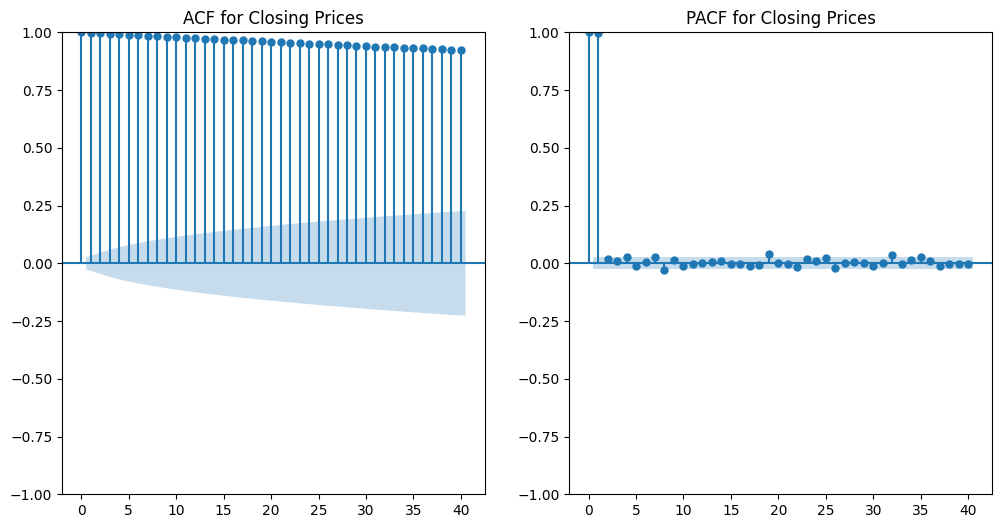

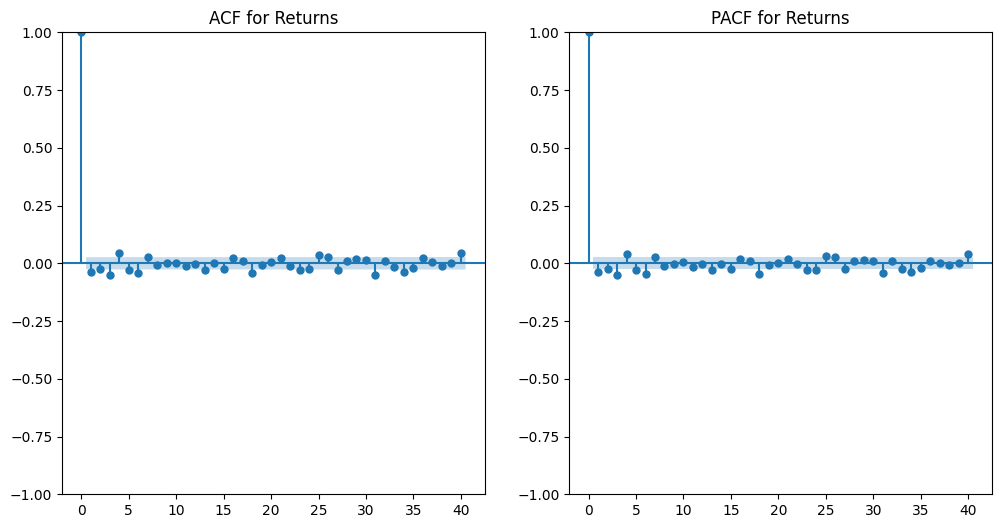

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX Model for Closing Prices - RMSE: 77.20118486845139, MAE: 54.5818979677779


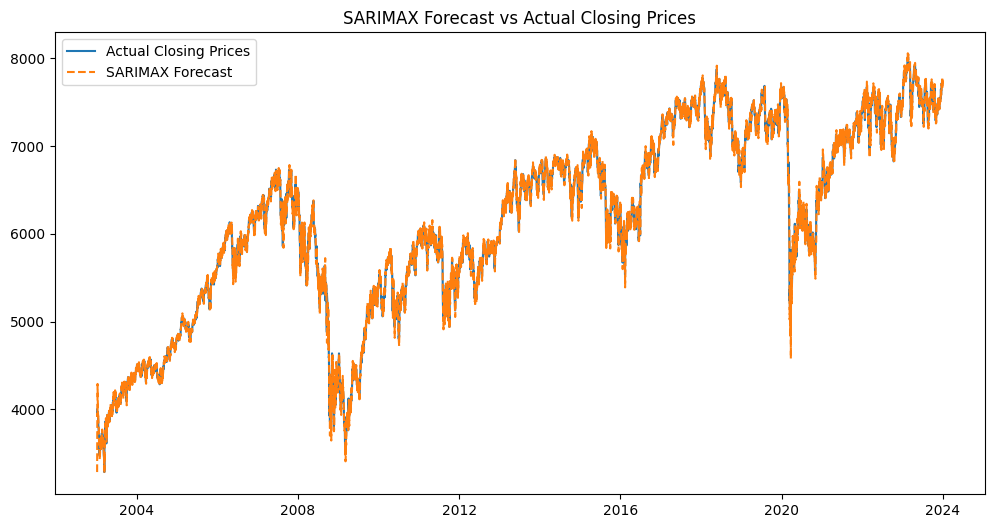

c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX Model for Returns - RMSE: 0.01568981641396777, MAE: 0.009692923933647698


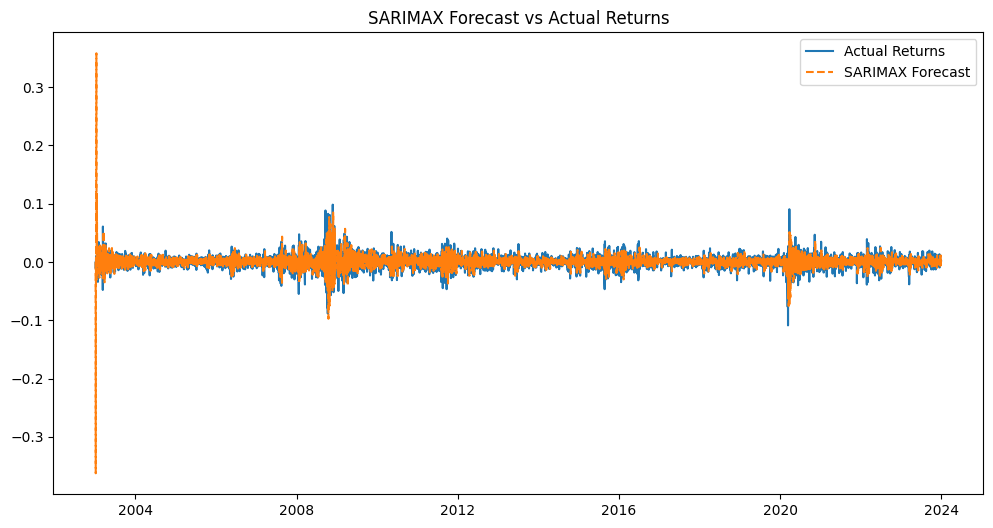

In [70]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the FTSE 100 data
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# **Remove duplicates if any**
if data.index.duplicated().any():
    print(f"Found {data.index.duplicated().sum()} duplicate dates. Removing duplicates.")
    data = data[~data.index.duplicated(keep='first')]

# Ensure the index is sorted properly
data.sort_index(inplace=True)

# **Check for NaN values in the index**
if data.index.isnull().any():
    print("Found NaN in index. Dropping rows with NaN index.")
    data = data.dropna()  # No need to specify 'Date' since it's the index

# **Ensure monotonic increasing order**
if not data.index.is_monotonic_increasing:
    print("Index is not strictly increasing. Sorting the index.")
    data = data.sort_index()

# **Reindex to business days and forward fill missing values**
data = data.asfreq('B', method='ffill')

# Calculate daily returns
data['Return'] = data['Close'].pct_change()

# Drop NaN values after calculating returns
data.dropna(inplace=True)

# Add an exogenous variable (for demonstration, let's use lagged closing prices as an exogenous variable)
data['Exog_Var'] = data['Close'].shift(1).fillna(0)  # Shifted closing prices

# Check stationarity for Closing Prices
result = adfuller(data['Close'])
print('ADF Statistic for Closing Prices: %f' % result[0])
print('p-value for Closing Prices: %f' % result[1])

# Scaling the data (optional step for large values)
scaler = MinMaxScaler()
data['Close_Scaled'] = scaler.fit_transform(data[['Close']])

# Plot ACF and PACF for Closing Prices
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Close'], lags=40, ax=plt.gca())
plt.title('ACF for Closing Prices')

plt.subplot(122)
plot_pacf(data['Close'], lags=40, ax=plt.gca())
plt.title('PACF for Closing Prices')
plt.show()

# Plot ACF and PACF for Returns
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Return'], lags=40, ax=plt.gca())
plt.title('ACF for Returns')

plt.subplot(122)
plot_pacf(data['Return'], lags=40, ax=plt.gca())
plt.title('PACF for Returns')
plt.show()

# Define exogenous variable
exog_var = data[['Exog_Var']]

# Set seasonal period to s=4
P, D, Q, s = 1, 1, 0, 4

# Fit SARIMAX model for closing prices with exogenous variables, increasing maxiter and using 'lbfgs' method
sarimax_close = SARIMAX(data['Close_Scaled'], order=(1,1,1), seasonal_order=(P, D, Q, s), exog=exog_var)
sarimax_close_fitted = sarimax_close.fit(disp=False, maxiter=1000, method='lbfgs')

# Forecast fitted values for closing prices with exogenous variables
data['SARIMAX_Close_Forecast'] = sarimax_close_fitted.fittedvalues

# **Inverse the scaling of forecasted values**
data['SARIMAX_Close_Forecast'] = scaler.inverse_transform(data[['SARIMAX_Close_Forecast']])

# Evaluate model performance for Closing Prices
rmse_close_sarimax = np.sqrt(mean_squared_error(data['Close'], data['SARIMAX_Close_Forecast']))
mae_close_sarimax = mean_absolute_error(data['Close'], data['SARIMAX_Close_Forecast'])
print(f'SARIMAX Model for Closing Prices - RMSE: {rmse_close_sarimax}, MAE: {mae_close_sarimax}')

# Plot the forecast vs actual for Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Closing Prices')
plt.plot(data['SARIMAX_Close_Forecast'], label='SARIMAX Forecast', linestyle='--')
plt.title('SARIMAX Forecast vs Actual Closing Prices')
plt.legend()
plt.show()

# Now for the return model, as is (no scaling needed)
sarimax_return = SARIMAX(data['Return'], order=(1, 1, 1), seasonal_order=(P, D, Q, s), exog=exog_var)
sarimax_return_fitted = sarimax_return.fit(disp=False, maxiter=1000, method='lbfgs')

# Forecast fitted values for returns with exogenous variables
data['SARIMAX_Return_Forecast'] = sarimax_return_fitted.fittedvalues

# Evaluate model performance for Returns
rmse_return_sarimax = np.sqrt(mean_squared_error(data['Return'], data['SARIMAX_Return_Forecast']))
mae_return_sarimax = mean_absolute_error(data['Return'], data['SARIMAX_Return_Forecast'])
print(f'SARIMAX Model for Returns - RMSE: {rmse_return_sarimax}, MAE: {mae_return_sarimax}')

# Plot the forecast vs actual for Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Return'], label='Actual Returns')
plt.plot(data['SARIMAX_Return_Forecast'], label='SARIMAX Forecast', linestyle='--')
plt.title('SARIMAX Forecast vs Actual Returns')
plt.legend()
plt.show()


Model Comparison

C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\3994387668.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\3994387668.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\Natchapol\AppData\Local\Temp\ipykernel_12232\3994387668.py:14: FutureWarning: A value is trying 

Naive for Closing Prices - RMSE: 62.3521, MAE: 43.1131
Naive for Returns - RMSE: 0.0161, MAE: 0.0110
SMA for Closing Prices - RMSE: 173.7303, MAE: 123.8915
SMA for Returns - RMSE: 0.0109, MAE: 0.0074
EWMA for Closing Prices - RMSE: 146.5119, MAE: 104.5154
EWMA for Returns - RMSE: 0.0106, MAE: 0.0072
Holt-Winters Additive for Closing Prices - RMSE: 62.4108, MAE: 43.3582


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g.

Holt-Winters Additive for Returns - RMSE: 0.0364, MAE: 0.0344
ARIMA for Closing Prices - RMSE: 69.0362, MAE: 43.5664


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

ARIMA for Returns - RMSE: 0.0111, MAE: 0.0075


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

ARIMAX for Closing Prices - RMSE: 69.0268, MAE: 43.5509


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

ARIMAX for Returns - RMSE: 0.0111, MAE: 0.0075


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

SARIMA for Closing Prices - RMSE: 97.3781, MAE: 54.6301


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

SARIMA for Returns - RMSE: 0.0112, MAE: 0.0076
SARIMAX for Closing Prices - RMSE: 97.3633, MAE: 54.6471


c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Natchapol\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, 

SARIMAX for Returns - RMSE: 0.0112, MAE: 0.0076
                    Model       Data Type        RMSE         MAE
0                   Naive  Closing Prices   62.352066   43.113090
1                   Naive         Returns    0.016089    0.010975
2                     SMA  Closing Prices  173.730340  123.891498
3                     SMA         Returns    0.010950    0.007429
4                    EWMA  Closing Prices  146.511948  104.515438
5                    EWMA         Returns    0.010648    0.007199
6   Holt-Winters Additive  Closing Prices   62.410835   43.358218
7   Holt-Winters Additive         Returns    0.036444    0.034445
8                   ARIMA  Closing Prices   69.036156   43.566399
9                   ARIMA         Returns    0.011143    0.007519
10                 ARIMAX  Closing Prices   69.026814   43.550887
11                 ARIMAX         Returns    0.011135    0.007517
12                 SARIMA  Closing Prices   97.378109   54.630148
13                 SARIMA   

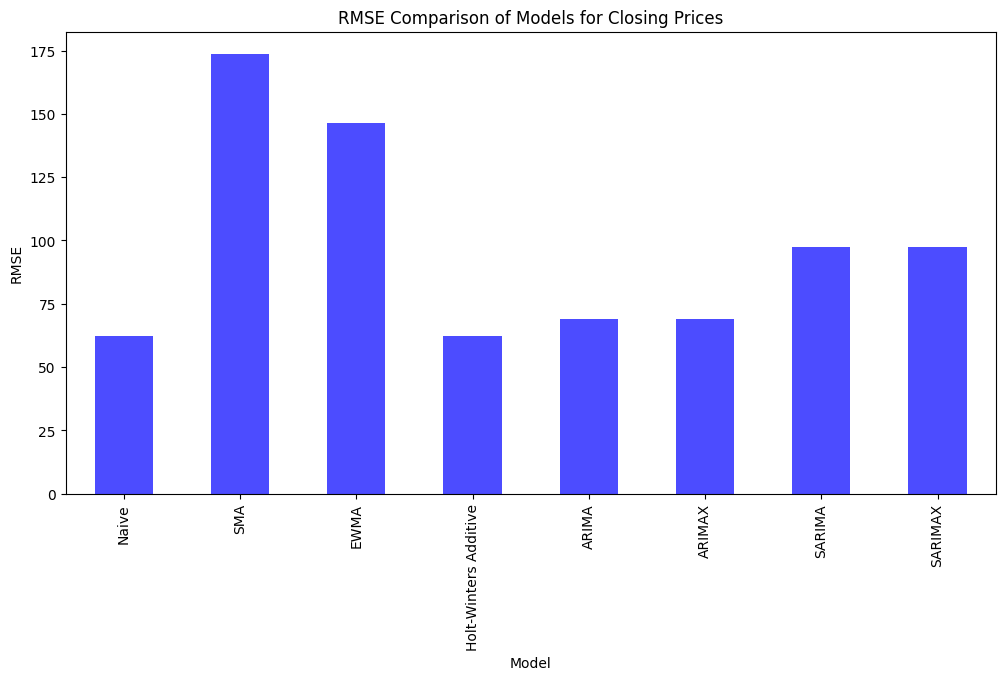

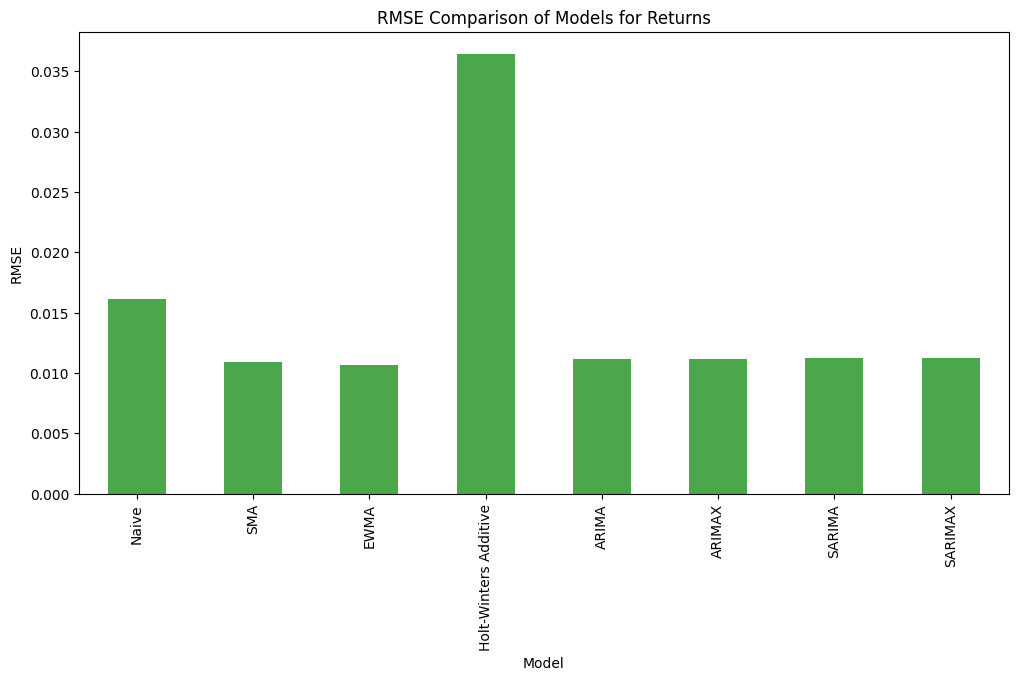

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Fill NaN values using forward fill and backward fill
data['Close'].fillna(method='ffill', inplace=True)
data['Return'].fillna(method='bfill', inplace=True)

# Example of defining exogenous variables (You should replace this with actual data)
# Assuming we have some exogenous variable columns in your dataset
# For example: data['Exogenous_Var'] = ... # Define your exogenous variable
# If you don't have actual exogenous variables, you can create dummy ones for testing:
data['Exogenous_Var'] = np.random.rand(len(data))  # Example dummy variable

# Function to evaluate model performance
def evaluate_model_performance(actual, predicted, model_name, data_type):
    actual_clean = actual.dropna()
    predicted_clean = predicted.dropna()

    # Align the cleaned data
    actual_clean, predicted_clean = actual_clean.align(predicted_clean, join='inner')

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(actual_clean, predicted_clean))
    mae = mean_absolute_error(actual_clean, predicted_clean)
    print(f'{model_name} for {data_type} - RMSE: {rmse:.4f}, MAE: {mae:.4f}')
    
    return {
        'Model': model_name,
        'Data Type': data_type,
        'RMSE': rmse,
        'MAE': mae
    }
# List to store results for model comparison
comparison_results = []

# Naive Forecast
data['Naive_Forecast_Close'] = data['Close'].shift(1)
data['Naive_Forecast_Return'] = data['Return'].shift(1)
aligned_close_naive = pd.concat([data['Close'], data['Naive_Forecast_Close']], axis=1).dropna()
aligned_return_naive = pd.concat([data['Return'], data['Naive_Forecast_Return']], axis=1).dropna()
comparison_results.append(evaluate_model_performance(aligned_close_naive['Close'], aligned_close_naive['Naive_Forecast_Close'], 'Naive', 'Closing Prices'))
comparison_results.append(evaluate_model_performance(aligned_return_naive['Return'], aligned_return_naive['Naive_Forecast_Return'], 'Naive', 'Returns'))

# Simple Moving Average (SMA)
window_size = 30  # Adjust as needed
data['SMA_Close'] = data['Close'].rolling(window=window_size).mean()
data['SMA_Return'] = data['Return'].rolling(window=window_size).mean()
aligned_close_sma = pd.concat([data['Close'], data['SMA_Close']], axis=1).dropna()
aligned_return_sma = pd.concat([data['Return'], data['SMA_Return']], axis=1).dropna()
comparison_results.append(evaluate_model_performance(aligned_close_sma['Close'], aligned_close_sma['SMA_Close'], 'SMA', 'Closing Prices'))
comparison_results.append(evaluate_model_performance(aligned_return_sma['Return'], aligned_return_sma['SMA_Return'], 'SMA', 'Returns'))

# Exponentially Weighted Moving Average (EWMA)
data['EWMA_Close'] = data['Close'].ewm(span=window_size).mean()
data['EWMA_Return'] = data['Return'].ewm(span=window_size).mean()
aligned_close_ewma = pd.concat([data['Close'], data['EWMA_Close']], axis=1).dropna()
aligned_return_ewma = pd.concat([data['Return'], data['EWMA_Return']], axis=1).dropna()
comparison_results.append(evaluate_model_performance(aligned_close_ewma['Close'], aligned_close_ewma['EWMA_Close'], 'EWMA', 'Closing Prices'))
comparison_results.append(evaluate_model_performance(aligned_return_ewma['Return'], aligned_return_ewma['EWMA_Return'], 'EWMA', 'Returns'))

# Holt-Winters Model (Additive)
hw_add_close = Holt(data['Close']).fit()
data['HW_Add_Forecast_Close'] = hw_add_close.fittedvalues
comparison_results.append(evaluate_model_performance(data['Close'], data['HW_Add_Forecast_Close'], 'Holt-Winters Additive', 'Closing Prices'))

hw_add_return = Holt(data['Return']).fit()
data['HW_Add_Forecast_Return'] = hw_add_return.fittedvalues
comparison_results.append(evaluate_model_performance(data['Return'], data['HW_Add_Forecast_Return'], 'Holt-Winters Additive', 'Returns'))

# ARIMA Model
p, d, q = 1,0,2  # Adjust based on ACF/PACF plots
arima_close = ARIMA(data['Close'], order=(p, d, q)).fit()
data['ARIMA_Forecast_Close'] = arima_close.fittedvalues
comparison_results.append(evaluate_model_performance(data['Close'], data['ARIMA_Forecast_Close'], 'ARIMA', 'Closing Prices'))

arima_return = ARIMA(data['Return'], order=(p, d, q)).fit()  # Adjust p, d, q for returns as needed
data['ARIMA_Forecast_Return'] = arima_return.fittedvalues
comparison_results.append(evaluate_model_performance(data['Return'], data['ARIMA_Forecast_Return'], 'ARIMA', 'Returns'))

# ARIMAX Model
arimax_close = ARIMA(data['Close'], order=(2, 0, 2), exog=data['Exogenous_Var']).fit()
data['ARIMAX_Forecast_Close'] = arimax_close.fittedvalues
comparison_results.append(evaluate_model_performance(data['Close'], data['ARIMAX_Forecast_Close'], 'ARIMAX', 'Closing Prices'))

arimax_return = ARIMA(data['Return'], order=(2, 0, 2), exog=data['Exogenous_Var']).fit()
data['ARIMAX_Forecast_Return'] = arimax_return.fittedvalues
comparison_results.append(evaluate_model_performance(data['Return'], data['ARIMAX_Forecast_Return'], 'ARIMAX', 'Returns'))

# SARIMA Model
P, D, Q, s = 1, 1, 0, 4  # Adjust these values based on ACF/PACF plots
sarima_close = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(P, D, Q, s)).fit()
data['SARIMA_Forecast_Close'] = sarima_close.fittedvalues
comparison_results.append(evaluate_model_performance(data['Close'], data['SARIMA_Forecast_Close'], 'SARIMA', 'Closing Prices'))

sarima_return = SARIMAX(data['Return'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit()
data['SARIMA_Forecast_Return'] = sarima_return.fittedvalues
comparison_results.append(evaluate_model_performance(data['Return'], data['SARIMA_Forecast_Return'], 'SARIMA', 'Returns'))

# SARIMAX Model
sarimax_close = SARIMAX(data['Close'], order=(1, 1, 1), seasonal_order=(P, D, Q, s), exog=data['Exogenous_Var']).fit()
data['SARIMAX_Forecast_Close'] = sarimax_close.fittedvalues
comparison_results.append(evaluate_model_performance(data['Close'], data['SARIMAX_Forecast_Close'], 'SARIMAX', 'Closing Prices'))

sarimax_return = SARIMAX(data['Return'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4), exog=data['Exogenous_Var']).fit()
data['SARIMAX_Forecast_Return'] = sarimax_return.fittedvalues
comparison_results.append(evaluate_model_performance(data['Return'], data['SARIMAX_Forecast_Return'], 'SARIMAX', 'Returns'))

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(comparison_results)

# Display the results for model comparison
print(results_df)

# Plotting the RMSE for each model
plt.figure(figsize=(12, 6))
results_df[results_df['Data Type'] == 'Closing Prices'].set_index('Model')['RMSE'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('RMSE Comparison of Models for Closing Prices')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(12, 6))
results_df[results_df['Data Type'] == 'Returns'].set_index('Model')['RMSE'].plot(kind='bar', color='green', alpha=0.7)
plt.title('RMSE Comparison of Models for Returns')
plt.ylabel('RMSE')
plt.show()
